In [1]:
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [2]:
# 读取文本数据
df = pd.read_csv('data/all-data.csv', delimiter=',', encoding='latin-1', header=None).fillna('')
df = df.rename(columns=lambda x: ['sentiment', 'text'][x])
print(df.shape)
df.head()

(4846, 2)


,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
#Some regex expression that we want to clean
punc = '~`!#$%^&*()_+-=|\';"＂:/.,?><~·！@#￥%……&*（）——+-=“：’；、。，？》{《}】【\n\]\[ '
df2=df
df2["text"] = df["text"].replace(regex=r"[%s]+" % punc,value=" ")
df2.head()

,sentiment,text
0,neutral,According to Gran the company has no plans to ...
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company s updated strategy fo...


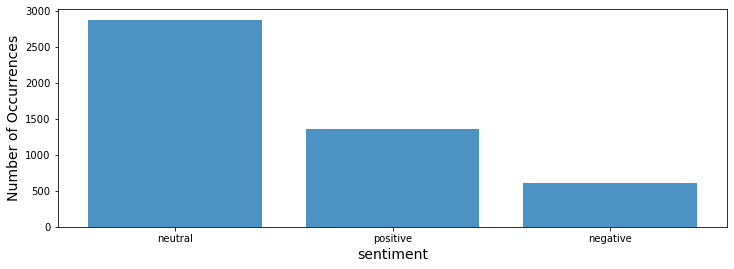

In [4]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('sentiment', fontsize=14)
plt.show();

In [15]:
dict={}
words_neu=[]
words_pos=[]
words_neg=[]
for i,sen in enumerate (df2["sentiment"]):
    if sen == "neutral" :
        line = list(df2.loc[i])
        for word in line[1].split(" "):
            if word not in words_neu:
                words_neu.append(word)
    if sen == "positive" :
        line = list(df2.loc[i])
        for word in line[1].split(" "):
            if word not in words_neu:
                words_pos.append(word)
    if sen == "negative" :
        line = list(df2.loc[i])
        for word in line[1].split(" "):
            if word not in words_neu:
                words_neg.append(word)
                


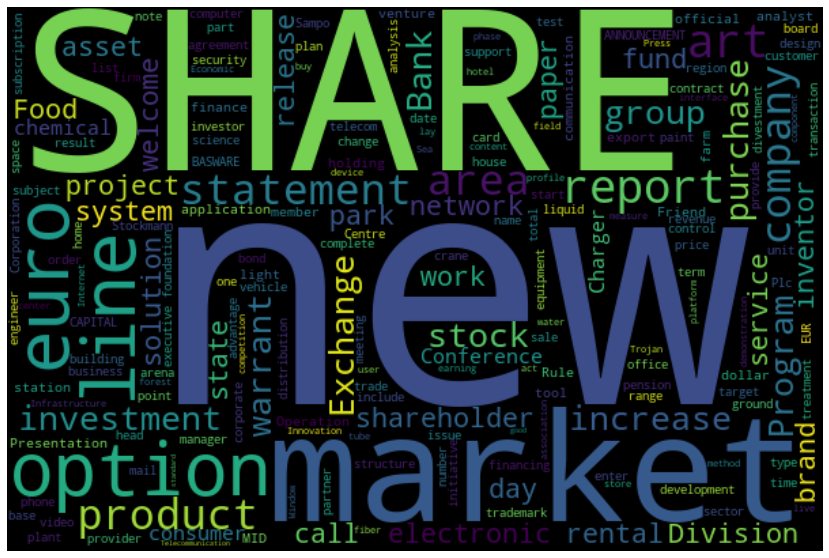

In [16]:
stop_words = set(stopwords.words('english'))
words_neu_clean=[]
words_pos_clean=[]
words_neg_clean=[]

for w in words_neu:
    if w.lower() not in stop_words and len(w)>2:
        words_neu_clean.append(w)
for w in words_pos:
    if w.lower() not in stop_words and len(w)>2:
        words_pos_clean.append(w)
for w in words_neg:
    if w.lower() not in stop_words and len(w)>2:
        words_neg_clean.append(w)

# 输入文本
text = " ".join(words_neu_clean)

# 创建WordCloud对象
wordcloud = WordCloud(width=600, height=400).generate(text)

# 绘制词云
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



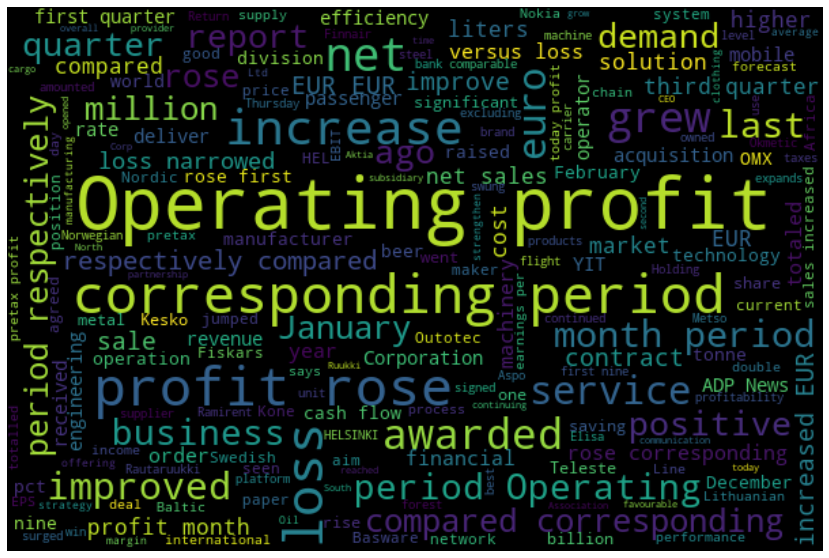

In [17]:
# 输入文本
text = " ".join(words_pos_clean)

# 创建WordCloud对象
wordcloud = WordCloud(width=600, height=400).generate(text)

# 绘制词云
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


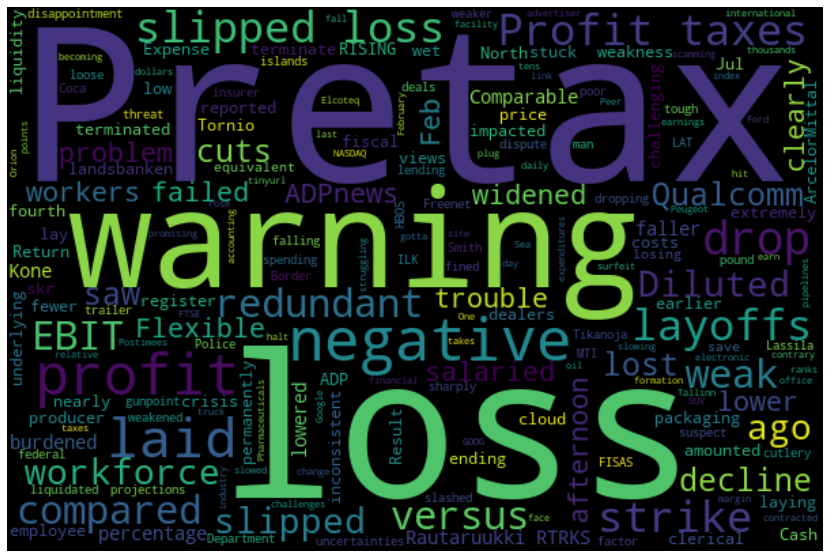

In [18]:
# 输入文本
text = " ".join(words_neg_clean)

# 创建WordCloud对象
wordcloud = WordCloud(width=600, height=400).generate(text)

# 绘制词云
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
